In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.data.txt")
data.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,arg_adhesion,singke_epith_cell_size,bland_chromo,bare_neclues,norm_Nucleoli,Mitoss,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.replace("?", -99999, inplace=True)

In [4]:
data.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
arg_adhesion              0
singke_epith_cell_size    0
bland_chromo              0
bare_neclues              0
norm_Nucleoli             0
Mitoss                    0
class                     0
dtype: int64

In [5]:
data.drop(["id"], inplace=True, axis=1)

In [6]:
data.head()

,clump_thickness,unif_cell_size,unif_cell_shape,arg_adhesion,singke_epith_cell_size,bland_chromo,bare_neclues,norm_Nucleoli,Mitoss,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
# We will used same Method to calculate the KNN 

In [8]:
# Euclidean Distance calculation.

In [9]:
from math import sqrt
x = [1,10]
y = [3,10]

euclidian_distance = sqrt((x[0]- y[0])**2 - (x[1]-y[1])**2)  
print(euclidian_distance)

2.0


In [10]:
# Numpy array will used for the Eucli distance
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import style
style.use("fivethirtyeight")
from collections import Counter
import warnings

In [11]:
dataset = {"k":[[1,2], [2,3], [3,1]], "r":[[6,5],[7,7],[8,6]]}
new_feature = [5,7]

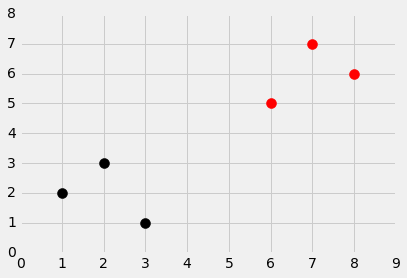

In [12]:
# for loop 
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color = i)

In [22]:
# We will define the K Ne
def knn(data,predict,k=3):
    if len(data) >= 3:
        warnings.warn("k is set to 3")
    
    distances = []
    for group in data:
        for features in data[group]:
            #np.sqrt( np.sum((np.array(features) - np.array(predict)))**2 ) same formula 
            eucli_dist = np.linalg.norm(np.array(features)- np.array(predict)) ## euclidian distance
            distances.append([eucli_dist,group])
            print("distance_list", distances)
    votes= [i[1] for i in sorted(distances)] 
    print("votes", Counter(votes).most_common(1)[0][0])
    
    vote_result = Counter(votes).most_common(1)[0][0]
    return(vote_result)            

In [23]:
result = knn(dataset,new_feature,k=3)
print(result)

distance_list [[2.2360679774997898, 'r']]
distance_list [[2.2360679774997898, 'r'], [2.0, 'r']]
distance_list [[2.2360679774997898, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
distance_list [[2.2360679774997898, 'r'], [2.0, 'r'], [3.1622776601683795, 'r'], [6.4031242374328485, 'k']]
distance_list [[2.2360679774997898, 'r'], [2.0, 'r'], [3.1622776601683795, 'r'], [6.4031242374328485, 'k'], [5.0, 'k']]
distance_list [[2.2360679774997898, 'r'], [2.0, 'r'], [3.1622776601683795, 'r'], [6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k']]
votes r
r


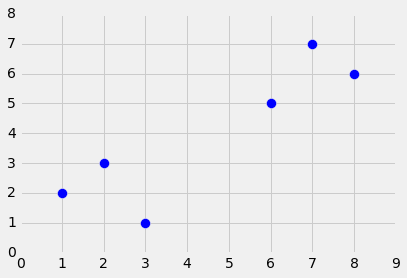

In [16]:
# lets plot the result
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100)